# AnyoneAI - Project II

# Making Estimations with our NBA dataset

In our first project, we learn how to create our own datasets by using a public API, Python and Pandas. We're now going to explore how to make predictive models for regression and classification tasks using ScikitLearn

The goals of this project are:
- Learn how to define a prediction task
- Selecting evaluation metrics and baseline models
- Perform feature engineering and standarization
- Training and using predictive models: Univariable and Multivariate Linear Regression, Classification
- Understand how Gradient Descent works by implementing a Linear Regressor in python

## Using Regression Models to Estimate players Salaries

A player's salary can be explained by a lot of factors: 

- Years in the league: NBA contracts are limited in price, players have caps on how much money they make depending on their years playing in the league
- Age: Highly correlated to the previous one, NBA players have a minimun age of 19 years
- Draft position: players out of USA universities are selected each year through a process called draft, in which each team selects a player in a predefined order for 2 rounds (meaning only 60 players are drafted each year). A rookie contract value depends on the draft position. (Undrafted players have to negotiate a salary independently)
- Performance in statistical categories: after the rookie contract, players can negotiate freely with teams, and usually statistical categories like points, rebounds and assists are extremely important.  
- Team: Even though there are limits to what all teams can expend in players salary, they all allocate their resources differently, and can be more willing to pay the penalties incurred by exceeding those limitations.
- Year in which the contract was signed: the mininum and maximum values of contracts possibles in the NBA changes depending on league revenue (television contracts, sponsorships, etc), so if the amount of money the teams make increases, players can negotiate bigger contracts.
- Intangibles: players can be valued also in things that are not easily translated to a statistic, good defensive players might not always have great stats but can be extremely important for a team, the same can be said about veteran players that help young ones to learn and are good locker-room guys.

But we're going to take a simplified approach, we'll try to use the data we already have to make the best estimator possible, and then we will analyze what went right and what could've gone wrong with our results.

### Analyzing our data

In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/project2_players_df.csv")
data.dropna(subset=["PTS"], inplace=True)

In [ ]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

Let's have another look at our previously generated dataset. 

In [ ]:
# Some first visualization and preparation of the data

data.dropna(subset=["TEAM_NAME"], inplace=True)
data[["DRAFT_NUMBER"]] = data[["DRAFT_NUMBER"]]. fillna("Undrafted")

#data[data["GAME_DATE"].isna()]
#data[data["TEAM_NAME"] == "Hornets"]
#data["GAME_DATE"] = data[["GAME_DATE"]].fillna(data.iloc[21,17])

data.head()

,PERSON_ID,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,Salary,AGE
0,1630173,Precious Achiuwa,Raptors,Forward,203,102,Nigeria,1999-09-19,1,20,115.0,17.3,6.5,5.1,0.8,0.4,0.5,2022-03-06,2711280,"22 years, 5 months, 25 days"
1,203500,Steven Adams,Grizzlies,Center,211,120,New Zealand,1993-07-20,8,12,648.0,26.8,9.3,7.9,1.4,0.9,0.9,2022-03-06,17073171,"28 years, 7 months, 24 days"
2,1628389,Bam Adebayo,Heat,Center,206,116,USA,1997-07-18,4,14,326.0,28.0,13.2,8.2,3.5,1.0,0.9,2022-03-07,28103550,"24 years, 7 months, 26 days"
3,1630583,Santi Aldama,Grizzlies,Forward,211,98,Spain,2001-01-10,0,30,27.0,10.2,3.3,2.4,0.5,0.1,0.3,2022-03-06,1994520,"21 years, 2 months, 6 days"
4,200746,LaMarcus Aldridge,Nets,Center,211,113,USA,1985-07-19,15,2,1073.0,33.7,19.1,8.1,1.9,0.7,1.1,2022-03-06,2641691,"36 years, 7 months, 25 days"


1.1. Plot all players statistics ("PTS", "REB", "AST","STL","BLK") against salary

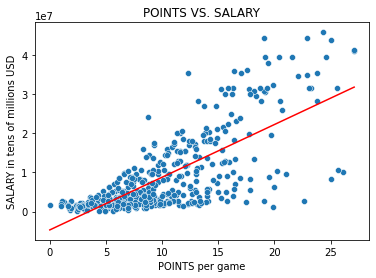

In [ ]:
# PLOT PTS AGAINS SALARY

# Linear Regression
lr1 = LinearRegression()
X = data["PTS"].values.reshape(-1, 1)
y = data["Salary"].values
lr1.fit(X, y)

x1 = X.min()
y1 = (lr1.coef_ * x1 + lr1.intercept_)[0]
x2 = X.max()
y2 = (lr1.coef_ * x2 + lr1.intercept_)[0]

# Plot linear regression
sns.lineplot(x=[x1, x2,], y=[y1, y2,], color='r')

# PTS vs. Salary scatter
sns.scatterplot(x="PTS", y="Salary", data=data).set_title("POINTS VS. SALARY")
plt.xlabel("POINTS per game")
plt.ylabel("SALARY in tens of millions USD")
plt.show()

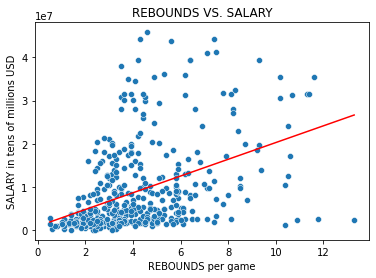

In [ ]:
# PLOT REB AGAINS SALARY

# Linear Regression
lr1 = LinearRegression()
X = data["REB"].values.reshape(-1, 1)
y = data["Salary"].values
lr1.fit(X, y)

x1 = X.min()
y1 = (lr1.coef_ * x1 + lr1.intercept_)[0]
x2 = X.max()
y2 = (lr1.coef_ * x2 + lr1.intercept_)[0]

# Plot linear regression
sns.lineplot(x=[x1, x2,], y=[y1, y2,], color='r')

# PTS vs. Salary scatter
sns.scatterplot(x="REB", y="Salary", data=data).set_title("REBOUNDS VS. SALARY")
plt.xlabel("REBOUNDS per game")
plt.ylabel("SALARY in tens of millions USD")
plt.show()

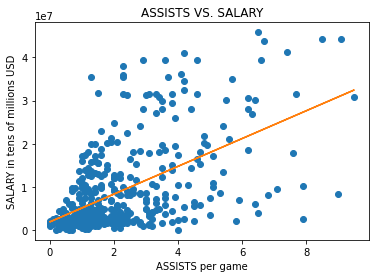

In [ ]:
# PLOT AST AGAINS SALARY

plt.plot(data["AST"], data["Salary"], 'o')
m, b = np.polyfit(data["AST"], data["Salary"], 1)
plt.plot(data["AST"], m*data["AST"]+b)
plt.title("ASSISTS VS. SALARY")
plt.xlabel("ASSISTS per game")
plt.ylabel("SALARY in tens of millions USD")
plt.show()

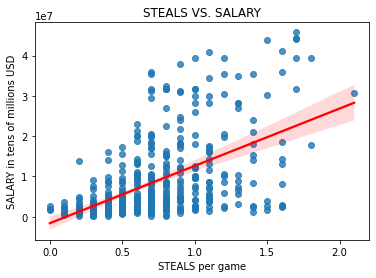

In [ ]:
# PLOT STL AGAINS SALARY

sns.regplot(data["STL"], data["Salary"], line_kws={"color": "red"})
plt.title("STEALS VS. SALARY")
plt.xlabel("STEALS per game")
plt.ylabel("SALARY in tens of millions USD")
plt.show()

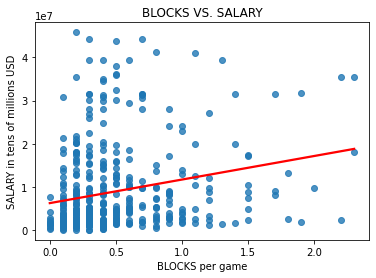

In [ ]:
# PLOT BLK AGAINS SALARY

sns.regplot(data["BLK"], data["Salary"], ci=None, line_kws={"color": "red"})
plt.title("BLOCKS VS. SALARY")
plt.xlabel("BLOCKS per game")
plt.ylabel("SALARY in tens of millions USD")
plt.show()

1.2. What can we say about these distributions?



> We can appreciate that, for the cases of PTS, RBS and AST, there is an accumulation in the lower left corner of the graphs, meaning, both the salaries and the statistics are concentrated in their low values, and adittionaly, as the statistics and the salary increase, the dispersion becomes wider and less accumulated. However, we can also note that there is a slight tendency to a better LINEAR correlation for the case of points vs. the salary, since we can see in the graph that, although it is true that the dispersion as we move away from the origin is greater, it tends to have a positive trend and correlation (compared with the linear regression that was graphed). For that reason, we could deduce, base in this regression, that the POINT statistics is the one that can contribute the most in predicting the salary of an NBA player. Having said that, we can continue to develop the model to make it more accuracy (because we can notice, that the linear correlation makes some negative salaries for players that have minimum points in their statistics). About the other statistics (STL and BLK), we have a very strong dispersion, so it would be hard to use those statistics individually to model a prediction of the salary.



### Splitting the Dataset

1.3. Split the dataset into train and testing sets. Use the Sklearn function for train/test splitting. Make sure to set the random state for reproducibility.

In [ ]:
X = data.drop(["Salary"],axis=1)     # independent features from pandas dataframe
y = data["Salary"]                   # dependent variable from pandas dataframe

# Choose your test size to split between training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=64)

# Verifying
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(data.shape)

(305, 19) (132, 19) (305,) (132,)
(437, 20)


### Baseline Model and Evaluation Metric

In every project, we need a baseline model that implements a very simple algorithm or heuristic so we can compare our results with it. 
In this case, we could create a function that always returns the average player salary, evaluate that, and then compare the result with our modeling to see if we are improving. 

We need an evaluation metric to see how well our models fit the data. For this project we will use [Mean Absolute Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error) as our regression evaluation metric, because it is a really simple metric to interpret. A lower value means the model performs better. 

For this particular problem, we will always round the value, as we don't need decimals for this task.

1.4. Create a Baseline model class that implements  fit() and predict() methods. As this model will not consider any other variable, the fit method should only receive a list of all players salaries. The predict method should receive and iterable and return a numpy array with the same length but every element should have the same value (the average salary)

In [ ]:
class BaselineModel():
    """A baseline model that always returns the same value, the mean of the players salary in the train data"""

    # NOTE IMPORTANT: all the methods must have the "self" word inside the "def" line code
    # NOTE IMPORTANT: the only variables that has to be "self." in their name inside our class development, are the __init__ ones that are 
    # constructed at the beginning. The rest of variables that we will call in the other methods (fit, predict, etc.) inside the "def" line 
    # code with the "self" word, we will put inside our class development without the "self." in their name, because, as we have said, that 
    # only applies to our __init__ variables
    
    # We will initialize the model, building the variables we need in our class, independing if these variables will have a value give 
    # for the user at the beginning of call the class, or not (in this case, the variable is not given by the user, is for intern process)
    def __init__(self):
        self.average = None

    # Here the user give the train data from which the model will process the iterations to make the best aproximation from features to target
    # based in the train data that it is working on. Here are created the information, variables, weights, etc, the model needs to make 
    # future predictions
    def fit(self, y_train):
        """
        Fit the training data. 
        
        Parameters
        ----------
        y_train: Union[pd.Series, np.ndarray]
            a pandas series or numpy array containing salary information
        """
        self.average = y_train.mean()
    
    # Here the user use the model created previously, and give the features in order to receive from the model the predictions the user wants
    # This is important because, with the test data (after the split), allows us to evaluate the performance of the model created
    def predict(self, X):
        """
        Predict salaries 
        
        Parameters
        ----------
        X: Union[pd.DataFrame, pd.Series, np.ndarray]
            a pandas series, dataframe or numpy array with the 
            
        Returns
        -------
        np.ndarray
            a numpy array of the same length as X, with all elements equal to the mean salary calculated in fit()
        """
        return np.full(len(X), self.average)

1.5. Evaluate the performance of our BaselineModel on the test set using mean_absolute_error from Sklearn (round the result)

In [ ]:
model_heur = BaselineModel()                  # Calling the model

model_heur.fit(y_train)                       # Fitting the model to my train set
y_pred = model_heur.predict(X_test)           # Predicting with my test set using the model created

mae = mean_absolute_error(y_test, y_pred)     # Calculating the performance based on MAE
baseline_mae = round(mae)

print("The performance of our BaselineModel on the test set using MAE from Sklearn is:",baseline_mae)

The performance of our BaselineModel on the test set using MAE from Sklearn is: 7825484


In [ ]:
# Verifying the MAE value
np.absolute(y_test - np.full(len(X_test), y_train.mean())).sum()/y_test.size

7825484.052309984

### Regression with a single variable

You're now going to start modeling data. We will start with a really simple approach, selecting just one variable, and doing a regression to see if we improve upon our baseline.


1.6. Select the variable you think would provide the best fit. Perform feature scaling on this variable using a Sklearn scaler.

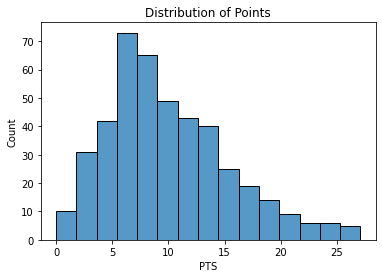

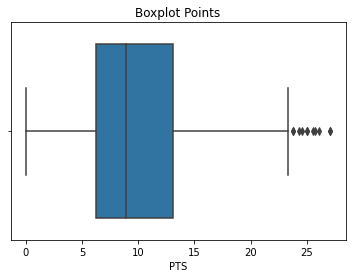

In [ ]:
# We will use the variable POINTS, because as we said before, is the best feature to get our target

# First, we will the histogram and boxplot to evaluate if we need a normalization or standardization scaler

sns.histplot(data["PTS"]).set_title("Distribution of Points")
plt.show()
print()
sns.boxplot(data=data, x="PTS").set_title('Boxplot Points')
plt.show()

In [ ]:
# We can notice that, there is no a Gaussian approximation in the histogram (seems chi^2), and although there are
# outliers in the boxplot, the values of points are within a fairly small range, and there are no outliers that stand 
# out much above the range, so we can conclude that there is no Gaussian distribution nor a relevance value about the 
# outliers, and therefore we will decide to use the Normalization as our feature scaling

# It is important to mention, that we have tested the models of all of this project using standard scaler too, and the 
# results in comparison with this actual model are on the final question of this project (answer of question 2.19)

mm_scaler = MinMaxScaler(feature_range=(0, 1))
mm_scaler.fit(X_train["PTS"].values.reshape(-1, 1))

X_train_scaled = mm_scaler.transform(X_train["PTS"].values.reshape(-1, 1))
X_test_scaled = mm_scaler.transform(X_test["PTS"].values.reshape(-1, 1))

1.7. Train a model with [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) from Sklearn using the default parameters. Evaluate the model's performance on the test set using the selected metric.

In [ ]:
model_SGDReg = SGDRegressor(random_state=64)

model_SGDReg.fit(X_train_scaled, y_train)
y_pred_SGDReg = model_SGDReg.predict(X_test_scaled)

mae_SGDReg = mean_absolute_error(y_test, y_pred_SGDReg)
default_mae = round(mae_SGDReg)
print("The default performance of our SGDRegressor model on the test set using MAE from Sklearn is:",default_mae)

The default performance of our SGDRegressor model on the test set using MAE from Sklearn is: 5139933


1.8. Read the Sklearn documentation, and write a function that tries different configurations for the hyperparameters for training: epochs, learning rate and alpha. For each combination of parameters, evaluate the trained algorithm on the test set, then save the results of each hyperparameter combination, finally select the one that has the best MAE (meaning the lowest number) and print the combination and the MAE.

In [ ]:
def search_best_hyperparameters(max_iter, eta0):
    result = {
        "hyperparameters": {"max_iter": None, "eta0": None}, 
        "mae": None
    }

    new_df = pd.DataFrame(columns = ["MAX_ITER","ETA0","MAE"])

    for max_i in max_iter:

        for et in eta0:
            model_SGDReg = SGDRegressor(max_iter=max_i, eta0=et, random_state=64)

            model_SGDReg.fit(X_train_scaled, y_train)
            y_pred_SGDReg = model_SGDReg.predict(X_test_scaled)

            mae_SGDReg = mean_absolute_error(y_test, y_pred_SGDReg)
            result_mae = round(mae_SGDReg)

            new_df.loc[len(new_df.index)] = [max_i, et, result_mae]
    
    index_find = new_df.index[new_df["MAE"]==new_df["MAE"].min()].tolist()
    new_list = new_df.iloc[index_find].values

    result["mae"] = new_list[0,2]
    result["hyperparameters"]["max_iter"] = new_list[0,0]
    result["hyperparameters"]["eta0"] = new_list[0,1]
    
    return result

In [ ]:
# Example list of hyperparameters values
max_iter = [1000, 1000000]
eta0 = [0.0001, 0.001, 0.01, 0.1]

result = search_best_hyperparameters(max_iter, eta0)
print(result)

best_mae = round(result["mae"])

{'hyperparameters': {'max_iter': 1000000.0, 'eta0': 0.0001}, 'mae': 5136957.0}


1.9. Compare the results of the baseline, the SGDRegressor with default parameters and the one with the best combination of hyperparameters you could find. (replace variables with the ones you used)

In [ ]:
print("Mean Absolute Error for each model:")
print(f"Baseline: {baseline_mae}")
print(f"Default SGDRegressor: {default_mae}")
print(f"Best SGDRegressor: {best_mae}")

Mean Absolute Error for each model:
Baseline: 7825484
Default SGDRegressor: 5139933
Best SGDRegressor: 5136957


### Multivariate Linear Regression

To improve our model, we will add more features to it. We will have to do some processing to our dataset to be able to use the data.
We'll start with the following variables:

- Points
- Rebounds
- Assists
- Blocks
- Experience
- Position
- Draft Number


1.10. Create a copy of the dataset generated in the first project that only has the following columns (and player id as an index):

["PTS", "REB", "AST", "BLK", "SEASON_EXP", "POSITION", "DRAFT_NUMBER", "TEAM_NAME", "SALARY"]

In [ ]:
upd_data = data.copy()
upd_data.drop(columns =["PLAYER_NAME", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "GP", "MIN", "STL", "GAME_DATE", "AGE"], inplace=True)
upd_data = upd_data.set_index("PERSON_ID")
upd_data = upd_data[["PTS", "REB", "AST", "BLK", "SEASON_EXP", "POSITION", "DRAFT_NUMBER", "TEAM_NAME", "Salary"]]
upd_data.head()

,PTS,REB,AST,BLK,SEASON_EXP,POSITION,DRAFT_NUMBER,TEAM_NAME,Salary
PERSON_ID,,,,,,,,,
1630173,6.5,5.1,0.8,0.5,1,Forward,20,Raptors,2711280
203500,9.3,7.9,1.4,0.9,8,Center,12,Grizzlies,17073171
1628389,13.2,8.2,3.5,0.9,4,Center,14,Heat,28103550
1630583,3.3,2.4,0.5,0.3,0,Forward,30,Grizzlies,1994520
200746,19.1,8.1,1.9,1.1,15,Center,2,Nets,2641691


#### Feature Engineering

1.11. Binning the DRAFT_NUMBER feature. Draft position directly impacts salaries during the first few years, but second round players and undrafted players don't have guaranteed contracts. So we're gonna divide the bins like this: 

       - 1 to 15: firstround_lottery
       - 15 to 30: firstround_non_lottery
       - 30 to 60: second_round
       - Undrafted: undrafted
       
Create a new column named DRAFT using these 4 categories. Drop the draft number column.

In [ ]:
# To verify in order to do the request
# upd_data["DRAFT_NUMBER"].unique()

upd_data["DRAFT_NUMBER"] = upd_data["DRAFT_NUMBER"].replace(["Undrafted"],0)
upd_data["DRAFT_NUMBER"] = upd_data["DRAFT_NUMBER"].astype("int")

bin_labels_draft = ["undrafted", "firstround_lottery", "firstround_non_lottery", "second_round"]
upd_data["DRAFT"] = pd.cut(upd_data["DRAFT_NUMBER"], bins=[-1, 0, 15, 30, 60], labels=bin_labels_draft)

upd_data = upd_data[["PTS", "REB", "AST", "BLK", "SEASON_EXP", "POSITION", "DRAFT", "TEAM_NAME", "Salary"]]

upd_data

,PTS,REB,AST,BLK,SEASON_EXP,POSITION,DRAFT,TEAM_NAME,Salary
PERSON_ID,,,,,,,,,
1630173,6.5,5.1,0.8,0.5,1,Forward,firstround_non_lottery,Raptors,2711280
203500,9.3,7.9,1.4,0.9,8,Center,firstround_lottery,Grizzlies,17073171
1628389,13.2,8.2,3.5,0.9,4,Center,firstround_lottery,Heat,28103550
1630583,3.3,2.4,0.5,0.3,0,Forward,firstround_non_lottery,Grizzlies,1994520
200746,19.1,8.1,1.9,1.1,15,Center,firstround_lottery,Nets,2641691
...,...,...,...,...,...,...,...,...,...
201152,12.9,5.9,1.8,0.4,14,Forward,firstround_lottery,Raptors,14190000
1629027,25.0,3.9,9.0,0.2,3,Guard,firstround_lottery,Hawks,8326471
1630209,6.0,5.7,1.0,0.4,0,Center,undrafted,Heat,1489065


In [ ]:
# Verifications:
# upd_data[upd_data["DRAFT"] == "undrafted"]

1.12. Encode the categorical features: DRAFT, POSITION and TEAM_NAME

In [ ]:
#Encoding the categorial feature DRAFT
ord_enc = OrdinalEncoder()

ord_enc.fit(upd_data[["DRAFT"]])
upd_data[["DRAFT"]] = ord_enc.transform(upd_data[["DRAFT"]])

#Encoding the categorial feature POSITION and TEAM_NAME
data_pos = pd.get_dummies(upd_data["POSITION"])
data_tm = pd.get_dummies(upd_data["TEAM_NAME"])
upd_data = upd_data.join(data_pos)
upd_data = upd_data.join(data_tm)

In [ ]:
upd_data_enc = upd_data.drop(["TEAM_NAME", "POSITION"], axis = 1)
upd_data_enc.head()

,PTS,REB,AST,BLK,SEASON_EXP,DRAFT,Salary,Center,Forward,Guard,...,Pistons,Raptors,Rockets,Spurs,Suns,Thunder,Timberwolves,Trail Blazers,Warriors,Wizards
PERSON_ID,,,,,,,,,,,,,,,,,,,,,
1630173,6.5,5.1,0.8,0.5,1,1.0,2711280,0,1,0,...,0,1,0,0,0,0,0,0,0,0
203500,9.3,7.9,1.4,0.9,8,0.0,17073171,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1628389,13.2,8.2,3.5,0.9,4,0.0,28103550,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1630583,3.3,2.4,0.5,0.3,0,1.0,1994520,0,1,0,...,0,0,0,0,0,0,0,0,0,0
200746,19.1,8.1,1.9,1.1,15,0.0,2641691,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Modeling

1.13. Split the dataset into train and test

In [ ]:
X = upd_data_enc.drop(["Salary"],axis=1)     # independent features from pandas dataframe
y = upd_data_enc["Salary"]                   # dependent variable from pandas dataframe

# Choose your test size to split between training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=64)

# Verifying
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(upd_data_enc.shape)

(305, 39) (132, 39) (305,) (132,)
(437, 40)


In [ ]:
# Verifying the table splitted
# X_train.head()

1.14. Perform feature scaling in all the numerical features ("PTS", "REB", "AST", "BLK", "SEASON_EXP") except for draft number

In [ ]:
mm_scaler.fit(X_train["PTS"].values.reshape(-1, 1))
X_train["PTS"] = mm_scaler.transform(X_train["PTS"].values.reshape(-1, 1))
X_test["PTS"] = mm_scaler.transform(X_test["PTS"].values.reshape(-1, 1))

mm_scaler.fit(X_train["REB"].values.reshape(-1, 1))
X_train["REB"] = mm_scaler.transform(X_train["REB"].values.reshape(-1, 1))
X_test["REB"] = mm_scaler.transform(X_test["REB"].values.reshape(-1, 1))

mm_scaler.fit(X_train["AST"].values.reshape(-1, 1))
X_train["AST"] = mm_scaler.transform(X_train["AST"].values.reshape(-1, 1))
X_test["AST"] = mm_scaler.transform(X_test["AST"].values.reshape(-1, 1))

mm_scaler.fit(X_train["BLK"].values.reshape(-1, 1))
X_train["BLK"] = mm_scaler.transform(X_train["BLK"].values.reshape(-1, 1))
X_test["BLK"] = mm_scaler.transform(X_test["BLK"].values.reshape(-1, 1))

mm_scaler.fit(X_train["SEASON_EXP"].values.reshape(-1, 1))
X_train["SEASON_EXP"] = mm_scaler.transform(X_train["SEASON_EXP"].values.reshape(-1, 1))
X_test["SEASON_EXP"] = mm_scaler.transform(X_test["SEASON_EXP"].values.reshape(-1, 1))

In [ ]:
# Verifying the scaling
#X_train

1.15. Write a function to train a SGDRegressor model with the new dataset, trying different hyperparameters, and selecting the one that performs the best.

In [ ]:
# Training our multivariate model with SGDRegressor from Sklearn using the default hyperparameters

model_SGDReg_mv = SGDRegressor(random_state=64)

model_SGDReg_mv.fit(X_train, y_train)
y_pred_SGDReg_mv = model_SGDReg_mv.predict(X_test)

mae_SGDReg_mv = mean_absolute_error(y_test, y_pred_SGDReg_mv)
default_mae_mv = round(mae_SGDReg_mv)
print("The default performance of our multivariate SGDRegressor model on the test set using MAE from Sklearn is:",default_mae_mv)

The default performance of our multivariate SGDRegressor model on the test set using MAE from Sklearn is: 5102950


In [ ]:
# Training our multivariate model with SGDRegressor from Sklearn using different hyperparameters

def search_best_hyperparameters_multivar(max_iter, eta0):
    result = {
        "hyperparameters": {"max_iter": None, "eta0": None}, 
        "mae": None
    }

    new_df = pd.DataFrame(columns = ["MAX_ITER","ETA0","MAE"])

    for max_i in max_iter:

        for et in eta0:
            model_SGDReg_mv = SGDRegressor(max_iter=max_i, eta0=et, random_state=64)

            model_SGDReg_mv.fit(X_train, y_train)
            y_pred_SGDReg_mv = model_SGDReg_mv.predict(X_test)

            mae_SGDReg_mv = mean_absolute_error(y_test, y_pred_SGDReg_mv)
            result_mae_mv = round(mae_SGDReg_mv)

            new_df.loc[len(new_df.index)] = [max_i, et, result_mae_mv]
    
    index_find = new_df.index[new_df["MAE"]==new_df["MAE"].min()].tolist()
    new_list = new_df.iloc[index_find].values

    result["mae"] = new_list[0,2]
    result["hyperparameters"]["max_iter"] = new_list[0,0]
    result["hyperparameters"]["eta0"] = new_list[0,1]
    
    return result

In [ ]:
# Example list of hyperparameters values
max_iter = [1000, 1000000, 1000000000]
eta0 = [0.0001, 0.001, 0.01, 0.1]

result_mv = search_best_hyperparameters_multivar(max_iter, eta0)
print(result_mv)

best_mae_mv = round(result_mv["mae"])

{'hyperparameters': {'max_iter': 1000.0, 'eta0': 0.01}, 'mae': 5102950.0}


1.16. How did the model performed compared to our univariate models? 

In [ ]:
print("Mean Absolute Error for each model:")
print()
print(f"Baseline: {baseline_mae}")
print()
print(f"Default SGDRegressor univariate model: {default_mae}")
print(f"Best SGDRegressor univariate model: {best_mae}")
print()
print(f"Default SGDRegressor multivariate model: {default_mae_mv}")
print(f"Best SGDRegressor multivariate model: {best_mae_mv}")

Mean Absolute Error for each model:

Baseline: 7825484

Default SGDRegressor univariate model: 5139933
Best SGDRegressor univariate model: 5136957

Default SGDRegressor multivariate model: 5102950
Best SGDRegressor multivariate model: 5102950


### DecisionTreeRegressor

It is possible that this problem might not be easily resolvable by a linear model, or that there could be better types of algorithms to tackle it. As an example, let's try with a very used algorithm, a Decision Tree.



1.17. Create new model using [DecisionTreeRegressor](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html) from scikit learn. We will use again all variables, and try different configuration for the following hyperparameters:

- max_depth
- min_samples_leaf
- max_features

These are all regularization hyperparameters for this algorithm. Read the documentation to get a better grasp of what each one does.

In [ ]:
# List of hyperparameter example values
max_depth = [5, 10, 15, 20, 50]
min_samples_leaf = [2, 10, 20, 50]
max_features = [5, 10]

1.18. Compare the results obtained with the best decision tree model against the baseline, default and the best params sgd regressors-

In [ ]:
# Training our model with Decision Tree Regressor from Sklearn using the default hyperparameters

model_DTreeReg = DecisionTreeRegressor(random_state=64)

model_DTreeReg.fit(X_train, y_train)
y_pred_DTreeReg = model_DTreeReg.predict(X_test)

mae_DTreeReg = mean_absolute_error(y_test, y_pred_DTreeReg)
default_mae_tree = round(mae_DTreeReg)
print("The default performance of our Decision Tree Regressor model on the test set using MAE from Sklearn is:",default_mae_tree)

The default performance of our Decision Tree Regressor model on the test set using MAE from Sklearn is: 3452105


In [ ]:
# Training our model with Decision Tree Regressor from Sklearn using different hyperparameters

def search_best_hyperparameters_dtreereg(max_depth, min_samples_leaf, max_features):
    result = {
        "hyperparameters": {"max_depth": None, "min_samples_leaf": None, "max_features": None}, 
        "mae": None
    }

    new_df = pd.DataFrame(columns = ["MAX_DEPTH","MIN_SAMPLES_LEAF","MAX_FEATURES","MAE"])

    for max_dep in max_depth:

        for min_sample in min_samples_leaf:

            for max_feat in max_features:

                model_DTreeReg = DecisionTreeRegressor(max_depth=max_dep, min_samples_leaf=min_sample, max_features=max_feat, random_state=64)

                model_DTreeReg.fit(X_train, y_train)
                y_pred_DTreeReg = model_DTreeReg.predict(X_test)

                mae_DTreeReg = mean_absolute_error(y_test, y_pred_DTreeReg)
                result_mae = round(mae_DTreeReg)

                new_df.loc[len(new_df.index)] = [max_dep, min_sample, max_feat, result_mae]
    
    index_find = new_df.index[new_df["MAE"]==new_df["MAE"].min()].tolist()
    new_list = new_df.iloc[index_find].values
    
    result["mae"] = new_list[0,3]
    result["hyperparameters"]["max_depth"] = new_list[0,0]
    result["hyperparameters"]["min_samples_leaf"] = new_list[0,1]
    result["hyperparameters"]["max_features"] = new_list[0,2]
    
    return result

In [ ]:
result_dtr = search_best_hyperparameters_dtreereg(max_depth, min_samples_leaf, max_features)
print(result_dtr)

best_mae_tree = result_dtr["mae"]

{'hyperparameters': {'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 5}, 'mae': 3472081}


In [ ]:
# Comparing the results obtained

print("Mean Absolute Error for each model:")
print()
print(f"Baseline: {baseline_mae}")
print()
print(f"Default SGDRegressor univariate model: {default_mae}")
print(f"Best SGDRegressor univariate model: {best_mae}")
print()
print(f"Default SGDRegressor multivariate model: {default_mae_mv}")
print(f"Best SGDRegressor multivariate model: {best_mae_mv}")
print()
print(f"Default Decision Tree Regressor model: {default_mae_tree}")
print(f"Best Decision Tree Regressor model: {best_mae_tree}")
print()
print("Note: The Best MAEs were obtained using the best combination of the hyperparameters tabulated previously")

Mean Absolute Error for each model:

Baseline: 7825484

Default SGDRegressor univariate model: 5139933
Best SGDRegressor univariate model: 5136957

Default SGDRegressor multivariate model: 5102950
Best SGDRegressor multivariate model: 5102950

Default Decision Tree Regressor model: 3452105
Best Decision Tree Regressor model: 3472081

Note: The Best MAEs were obtained using the best combination of the hyperparameters tabulated previously


### Analyzing our results

Based on what you found, and what you read about players salaries above, answer the following: 

1.19. Which kind of model worked better in this dataset, linear or non linear models? Do you have any hypothesis about why? 

> In this project, a nonlinear model is the one that works best, because obtains a lower MAE compared to the rest. This may be due to the characteristics of the data that we have in our dataset, which, as we saw at the beginning of the project, although it is true that they have a certain tendency in some cases, keep a significant dispersion in each of the features, therefore using linear models could be inefficient, and the model would need more complex mathematical approximations to be able to adapt to such variation, and the several features that each player have.



1.20. Is there something else we could do to improve our results if wanted to make a more accurate model?

> Definitely. The universe of models, not only the non-linear ones, but some others that may exist within the scikit learn environment, or some other libraries, could give us a better approximation to the target we want based on the features we have available. If we add to this, that in each of the models to iterate, we could also iterate values of its different hyperparameters, we could improve the predictive model more and more. Also, we can add more features to each player, ones that really improve our model dedicated to predict salaries. We can continue thinking about all the improvements we can make, however, to do so, we will surely have limitations of time, money, knowledge, etc., so it is important to take all of this into account to make the best decision on how to deal with what is requested according to the context in which we find ourselves.



## Star or no Star? Predicting players All-NBA selections

In this section we're going to try to solve a different question:

Can we train a model to predict which players are going to be selected to ALL-NBA teams at the end of the season? This is a [binary classification](https://en.wikipedia.org/wiki/Binary_classification) task, so we're training our first classifier model to solve this problem.

Consider that:

- Being selected as part of the [All-NBA teams](https://en.wikipedia.org/wiki/All-NBA_Team) is different than being selected for [All-Star Game](https://en.wikipedia.org/wiki/NBA_All-Star_Game). 
- You're trying to predict All-NBA selections, which takes place after the regular season but before playoffs start, so we're only going to use players and teams statistics about the regular season (you're not going to consider if the players got to the NBA finals for example). 
- All Star game takes place at the middle point of the regular season, players are selected based on partial season performance, and the general public has 50% of the votes, so it is also a more popularity-based award.
- All-NBA teams are divided in first, second and third teams of 5 players each, divided by position: 2 front court players (guards), 2 backcourt players (forwards) and 1 center.
- As only 15 players are selected to All-NBA teams each year (out of more than 400 qualifying players), our dataset is going to be imbalanced. You're going to have to find a good strategy to deal with this inbalance.

### Analyzing the data

To do this task, you're going to need historical information about All-NBA selections. We'll use a dataset that contains information about players from season starting in 1990 and ending in the 2018-2019 season.
The dataset contains statistics for all players, and a column named "all-nba" that is going to be our target variable, 1 means the player was selected to an All-NBA team that season.


2.1. Load the dataset "all_nba_1990_2017_dataset.csv" from disk, look at the data inside it and print:
- number of rows
- number of seasons
- number of unique players
- number of all-nba selections vs non selected 

In [ ]:
import pandas as pd
all_nba_df = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_1990_2017_dataset.csv", index_col=0)

In [ ]:
all_nba_df

,season_id,player_id,player_season,player,season,season_start,team,games,gamesstarted,mp,...,2p_perc,ft_perc,trb,ast,stl,blk,tov,pf,pts,all_nba
0,0,0,1,Alaa Abdelnaby,1990-91,1990,POR,43,0,6.7,...,0.474,0.568,2.1,0.3,0.1,0.3,0.5,0.9,3.1,0
1,1,0,2,Alaa Abdelnaby,1991-92,1991,POR,71,1,13.2,...,0.493,0.752,3.7,0.4,0.4,0.2,0.9,1.9,6.1,0
2,2,0,3,Alaa Abdelnaby,1992-93,1992,TOT,75,52,17.5,...,0.519,0.759,4.5,0.4,0.3,0.3,1.3,2.5,7.7,0
3,3,0,4,Alaa Abdelnaby,1993-94,1993,BOS,13,0,12.2,...,0.436,0.640,3.5,0.2,0.2,0.2,1.3,1.5,4.9,0
4,4,0,5,Alaa Abdelnaby,1994-95,1994,TOT,54,0,9.4,...,0.515,0.571,2.1,0.2,0.3,0.2,0.8,1.9,4.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15348,15348,2817,2,Paul Zipser,2017-18,2017,CHI,54,12,15.3,...,0.355,0.760,2.4,0.9,0.4,0.3,0.8,1.6,4.0,0
15349,15349,2818,1,Ante Zizic,2017-18,2017,CLE,32,2,6.7,...,0.731,0.724,1.9,0.2,0.1,0.4,0.3,0.9,3.7,0
15351,15351,2819,1,Jim Zoet,1982-83,1982,DET,7,0,4.3,...,0.200,0.000,1.1,0.1,0.1,0.4,0.6,1.3,0.3,0
15352,15352,2820,1,Ivica Zubac,2016-17,2016,LAL,38,11,16.0,...,0.536,0.653,4.2,0.8,0.4,0.9,0.8,1.7,7.5,0


In [ ]:
#all_nba_df.isna().sum()
print("The number of rows in the dataset are:",len(all_nba_df))
print("The number of seasons in the dataset are:",len(all_nba_df["season"].unique()))
print("The number of players in the dataset are:",len(all_nba_df["player_id"].unique()))
print()
print("Number of all-nba selections vs non selected")
print(len(all_nba_df[all_nba_df["all_nba"] == 1]),"vs",len(all_nba_df[all_nba_df["all_nba"] == 0]))
print("Note: it is important to mention that the last numbers are the count from the total selections since season 1979-80 to 2017-18,")
print("for that reason, they are big numbers, because includes several players repeated because they were playing more than one season")

The number of rows in the dataset are: 14825
The number of seasons in the dataset are: 39
The number of players in the dataset are: 2718

Number of all-nba selections vs non selected
496 vs 14329
Note: it is important to mention that the last numbers are the count from the total selections since season 1979-80 to 2017-18,
for that reason, they are big numbers, because includes several players repeated because they were playing more than one season


### Splitting the dataset

2.2. Split the dataset in training and test sets. Make sure to keep the distribution of values in the target variable.

Use columns: 'team', 'games', 'games_started', 'mp', 'fg_perc', '3p_perc',
       '2p_perc', 'ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts','all_nba'
       
    

In [ ]:
# Preparing the dataset requested
all_nba_upd = all_nba_df[["team", "games", "gamesstarted", "mp", "fg_perc", "3p_perc", "2p_perc", "ft_perc", "trb", "ast", "stl", "blk", "tov", "pf", "pts", "all_nba"]]
all_nba_upd

,team,games,gamesstarted,mp,fg_perc,3p_perc,2p_perc,ft_perc,trb,ast,stl,blk,tov,pf,pts,all_nba
0,POR,43,0,6.7,0.474,0.000,0.474,0.568,2.1,0.3,0.1,0.3,0.5,0.9,3.1,0
1,POR,71,1,13.2,0.493,0.000,0.493,0.752,3.7,0.4,0.4,0.2,0.9,1.9,6.1,0
2,TOT,75,52,17.5,0.518,0.000,0.519,0.759,4.5,0.4,0.3,0.3,1.3,2.5,7.7,0
3,BOS,13,0,12.2,0.436,0.000,0.436,0.640,3.5,0.2,0.2,0.2,1.3,1.5,4.9,0
4,TOT,54,0,9.4,0.511,0.000,0.515,0.571,2.1,0.2,0.3,0.2,0.8,1.9,4.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15348,CHI,54,12,15.3,0.346,0.336,0.355,0.760,2.4,0.9,0.4,0.3,0.8,1.6,4.0,0
15349,CLE,32,2,6.7,0.731,0.000,0.731,0.724,1.9,0.2,0.1,0.4,0.3,0.9,3.7,0
15351,DET,7,0,4.3,0.200,0.000,0.200,0.000,1.1,0.1,0.1,0.4,0.6,1.3,0.3,0
15352,LAL,38,11,16.0,0.529,0.000,0.536,0.653,4.2,0.8,0.4,0.9,0.8,1.7,7.5,0


In [ ]:
X = all_nba_upd.drop(["team", "all_nba"],axis=1)     # independent features from pandas dataframe
y = all_nba_upd["all_nba"]                           # dependent variable from pandas dataframe

# Choose your test size to split between training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=64)

# Verifying
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(all_nba_upd.shape)

(10377, 14) (4448, 14) (10377,) (4448,)
(14825, 16)


In [ ]:
# Verifying the stratification
#y_train[y_train == 1]
#y_test[y_test == 1]

### Baseline model and Evaluation Metrics

In this oportunity we'll define our baseline model as the model we can train with the minimun amount of work on the dataset. For this you're gonna train a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with default parameters, and without doing any preprocessing to our data.

2.3. Let's start with a simple test. What accuracy would we get if we had a baseline model that always predicted 0 (player not selected to all nba)?

In [ ]:
class BaselineModelClasif():
        
    # NOTE IMPORTANT: all the methods must have the "self" word inside the "def" line code
    # NOTE IMPORTANT: the only variables that has to be "self." in their name inside our class development, are the __init__ ones that are 
    # constructed at the beginning. The rest of variables that we will call in the other methods (fit, predict, etc.) inside the "def" line 
    # code with the "self" word, we will put inside our class development without the "self." in their name, because, as we have said, that 
    # only applies to our __init__ variables

    # We will initialize the model, building the variables we need in our class, independing if these variables will have a value give 
    # for the user at the beginning of call the class, or not (in this case, the variable is not given by the user, is for intern process)
    def __init__(self):
        self.result = None

    # Here the user give the train data from which the model will process the iterations to make the best aproximation from features to target
    # based in the train data that it is working on. Here are created the information, variables, weights, etc, the model needs to make 
    # future predictions
    def fit(self, X_train, y_train):    
        self.result = 0
    
    # Here the user use the model created previously, and give the features in order to receive from the model the predictions the user wants
    # This is important because, with the test data (after the split), allows us to evaluate the performance of the model created
    def predict(self, X_test):
        return np.full(len(X_test), self.result)

In [ ]:
model_base_clasif = BaselineModelClasif()                     # Calling the model

model_base_clasif.fit(X_train, y_train)                       # Fitting the model to my train set
y_pred_modelclas = model_base_clasif.predict(X_test)          # Predicting with my test set using the model created

accur = accuracy_score(y_test, y_pred_modelclas)              # Calculating the performance based on MAE
pre_baseline_accur = round(accur,4)

print("The accuracy of our Classification BaselineModel on the test is:",pre_baseline_accur)

The accuracy of our Classification BaselineModel on the test is: 0.9665


2.4. What does this tells us about the data and the use of accuracy as an evaluation metric?

> This result tells us that the accuracy, seen as the result of a classification model, is directly proportional to the probability of success of the value it assumes, taking into account that there are only two possible values in response to the predictions. However, it is also important to note that, in our dataset, most of the results will be 0 (not selected), because very few players are selected per season (15 of more than 400); therefore, if our base model has a flat result of 0, it is logical that the accuracy is high, since most of the real results are 0, and for that reason, the base model will be correct most of the time, and with a high value of accuracy.



2.5. Scale all numerical features in the dataset (we will keep this scaling for future modeling, so make sure to do it in place)

In [ ]:
cols_scaling = ["games", "gamesstarted", "mp", "fg_perc", "3p_perc", "2p_perc", "ft_perc", "trb", "ast", "stl", "blk", "tov", "pf", "pts"]

mm_scaler.fit(X_train[cols_scaling].values)
X_train[cols_scaling] = mm_scaler.transform(X_train[cols_scaling].values)
X_test[cols_scaling] = mm_scaler.transform(X_test[cols_scaling].values)

In [ ]:
# Verifying the scaling
#X_train

2.6. Train a LogisticRegression with default parameters, use only the numerical features (omit the team information for now). This will be our baseline model. 

In [ ]:
# Training our model with Logistic Regressor from Sklearn using the default hyperparameters

model_LogReg = LogisticRegression(random_state=64)

model_LogReg.fit(X_train, y_train)
y_pred_baselineLog = model_LogReg.predict(X_test)

2.7. Evaluate our baseline model using this metrics: 

    - accuracy
    - precision
    - recall
    - f1

In [ ]:
baseline_accur_log = accuracy_score(y_test, y_pred_baselineLog)
baseline_prec_log = precision_score(y_test, y_pred_baselineLog)
baseline_recall_log = recall_score(y_test, y_pred_baselineLog)
baseline_f1_log = f1_score(y_test, y_pred_baselineLog)

print("The accuracy metric for our logistic regression baseline model is:",round(baseline_accur_log,4))
print("The precision metric for our logistic regression baseline model is:",round(baseline_prec_log,4))
print("The recall metric for our logistic regression baseline model is:",round(baseline_recall_log,4))
print("The f1 metric for our logistic regression baseline model is:",round(baseline_f1_log,4))

The accuracy metric for our logistic regression baseline model is: 0.9804
The precision metric for our logistic regression baseline model is: 0.8605
The recall metric for our logistic regression baseline model is: 0.4966
The f1 metric for our logistic regression baseline model is: 0.6298


From now on, you'll be evaluating you model primarily using the F1 Score metric, but we also want to avoid models that have very low recall. 

### Classification

#### Feature engineering

2.8. One hot encode the Team feature. Make sure to drop the original column.

In [ ]:
#all_nba_upd.head()

In [ ]:
#Encoding the Team feature using the initial dataset required at the beginning of this section
data_team = pd.get_dummies(all_nba_upd["team"])
all_nba_upd = all_nba_upd.join(data_team)

In [ ]:
# Doing the dataset required with team encoding
all_nba_enc = all_nba_upd.drop(["team"], axis = 1)
all_nba_enc.head()

,games,gamesstarted,mp,fg_perc,3p_perc,2p_perc,ft_perc,trb,ast,stl,...,SAC,SAS,SDC,SEA,TOR,TOT,UTA,VAN,WAS,WSB
0,43,0,6.7,0.474,0.0,0.474,0.568,2.1,0.3,0.1,...,0,0,0,0,0,0,0,0,0,0
1,71,1,13.2,0.493,0.0,0.493,0.752,3.7,0.4,0.4,...,0,0,0,0,0,0,0,0,0,0
2,75,52,17.5,0.518,0.0,0.519,0.759,4.5,0.4,0.3,...,0,0,0,0,0,1,0,0,0,0
3,13,0,12.2,0.436,0.0,0.436,0.640,3.5,0.2,0.2,...,0,0,0,0,0,0,0,0,0,0
4,54,0,9.4,0.511,0.0,0.515,0.571,2.1,0.2,0.3,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Doing again the split because it is a dataset with team encoding now

X = all_nba_enc.drop(["all_nba"],axis=1)     # independent features from pandas dataframe
y = all_nba_enc["all_nba"]                   # dependent variable from pandas dataframe

# Choose your test size to split between training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=64)

# Verifying
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(all_nba_enc.shape)

(10377, 55) (4448, 55) (10377,) (4448,)
(14825, 56)


In [ ]:
# Verifying the stratification
#y_train[y_train == 1]
#y_test[y_test == 1]

In [ ]:
# Doing again the scaling because it is a dataset with team encoding now

cols_scaling = ["games", "gamesstarted", "mp", "fg_perc", "3p_perc", "2p_perc", "ft_perc", "trb", "ast", "stl", "blk", "tov", "pf", "pts"]

mm_scaler.fit(X_train[cols_scaling].values)
X_train[cols_scaling] = mm_scaler.transform(X_train[cols_scaling].values)
X_test[cols_scaling] = mm_scaler.transform(X_test[cols_scaling].values)

In [ ]:
# Verifying the scaling
#X_train

#### Modeling

In [ ]:
# Training our model with Logistic Regressor from Sklearn using the default hyperparameters and the team encoding

# We are doing this part, because we have tested the model using the default hyperparameters, and the results in comparison
# with this actual model are on the final question of this project (answer of question 2.19)

model_LogReg = LogisticRegression(random_state=64)

model_LogReg.fit(X_train, y_train)
y_pred_bl_wteam_Log = model_LogReg.predict(X_test)

In [ ]:
bl_wteam_accur_log = accuracy_score(y_test, y_pred_bl_wteam_Log)
bl_wteam_prec_log = precision_score(y_test, y_pred_bl_wteam_Log)
bl_wteam_recall_log = recall_score(y_test, y_pred_bl_wteam_Log)
bl_wteam_f1_log = f1_score(y_test, y_pred_bl_wteam_Log)

print("The accuracy metric for our logistic regression baseline model with team encoding is:",round(bl_wteam_accur_log,4))
print("The precision metric for our logistic regression baseline model with team encoding is:",round(bl_wteam_prec_log,4))
print("The recall metric for our logistic regression baseline model with team encoding is:",round(bl_wteam_recall_log,4))
print("The f1 metric for our logistic regression baseline model with team encoding is:",round(bl_wteam_f1_log,4))

The accuracy metric for our logistic regression baseline model with team encoding is: 0.9818
The precision metric for our logistic regression baseline model with team encoding is: 0.8469
The recall metric for our logistic regression baseline model with team encoding is: 0.557
The f1 metric for our logistic regression baseline model with team encoding is: 0.6721


2.9. Train a logistic regresion model, find the best hyperparameters for: tols, C and max_iter. Try at least 4 values of each parameter. Remember to select based on f1 score, but report also precision and recall. Save the best performing model to use in the next steps.

In [ ]:
# List of hyperparameter example values
tols_log = [0.000001, 0.00001, 0.0001, 0.001, 0.01]
cs_log = [3, 2.5, 2, 1.5, 1, 0.5]
max_iter_log = [100000, 10000, 1000, 500, 100, 50, 25, 10]

In [ ]:
# Training our model with Logistic Regresion model from Sklearn using different hyperparameters

def search_best_hyperparameters_logreg(tols_log, cs_log, max_iter_log):
    result = {
        "hyperparameters": {"tol": None, "C": None, "max_iter": None}, 
        "f1": None,
        "precision": None,
        "recall": None
    }

    new_df = pd.DataFrame(columns = ["TOLs","Cs","MAX_ITERs","f1","precision","recall"])

    for tols in tols_log:

        for cs in cs_log:

            for max_it in max_iter_log:

                model_LogReg = LogisticRegression(tol=tols, C=cs, max_iter=max_it, random_state=64)

                model_LogReg.fit(X_train, y_train)
                y_pred_LogReg = model_LogReg.predict(X_test)

                f1_log = f1_score(y_test, y_pred_LogReg)
                prec_log = precision_score(y_test, y_pred_LogReg)
                recall_log = recall_score(y_test, y_pred_LogReg)
                
                new_df.loc[len(new_df.index)] = [tols, cs, max_it, f1_log, prec_log, recall_log]

    index_find = new_df.index[new_df["f1"]==new_df["f1"].max()].tolist()
    new_list = new_df.iloc[index_find].values

    result["hyperparameters"]["tol"] = new_list[0,0]
    result["hyperparameters"]["C"] = new_list[0,1]
    result["hyperparameters"]["max_iter"] = new_list[0,2]
    result["f1"] = new_list[0,3]
    result["precision"] = new_list[0,4]
    result["recall"] = new_list[0,5]

    return result

In [ ]:
result_logreg = search_best_hyperparameters_logreg(tols_log, cs_log, max_iter_log)
#result_logreg
print(result_logreg)

{'hyperparameters': {'tol': 1e-06, 'C': 2.5, 'max_iter': 100000.0}, 'f1': 0.6953125000000001, 'precision': 0.8317757009345794, 'recall': 0.5973154362416108}


In [ ]:
best_f1_log = result_logreg["f1"]
best_prec_log = result_logreg["precision"]
best_recall_log = result_logreg["recall"]

print("The precision metric for our best logistic regression model with team encoding is:",round(best_prec_log,4))
print("The recall metric for our best logistic regression model with team encoding is:",round(best_recall_log,4))
print("The f1 metric for our best logistic regression model with team encoding is:",round(best_f1_log,4))

The precision metric for our best logistic regression model with team encoding is: 0.8318
The recall metric for our best logistic regression model with team encoding is: 0.5973
The f1 metric for our best logistic regression model with team encoding is: 0.6953


#### Evaluating on New Data

You're now going to evaluate the results on a test dataset that has not being used to train or do hyperparameter tuning, this is sometimes known as a Test set (in this cases the test set used for training is known as validation set, yeah, it's confusing, but you can read about it [here](https://machinelearningmastery.com/difference-test-validation-datasets/))

2.10. Load the dataset [all_nba_2018_dataset.csv](https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_dataset.csv) in one dataframe and [all_nba_2018_selections.csv](https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_selections.csv)) in another, then:

    - Scale the numerical features. Columns season_id, player_id, player_season, player, season and season_start will not be used for prediction, you can keep them but remember not to pass them to the classifier.
    
    - Create the one hot encoded features for team. This step will be complex, as you will have to consider that in the 2018 season there are 30 teams, but the previous dataset contains 40 teams, that is because a lot of teams changed names or cities over the years. You need to add those 10 different team names in this dataset (with all values in 0) to make the classifier work.

In [ ]:
all_nba_2018_df = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_dataset.csv", index_col=0)
all_nba_2018_selections = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_selections.csv", index_col=0)

In [ ]:
all_nba_2018_df.head()

,season_id,player_id,player_season,player,season,season_start,team,games,gamesstarted,mp,...,3p_perc,2p_perc,ft_perc,trb,ast,stl,blk,tov,pf,pts
34,34,5,2,Alex Abrines,2018-19,2018,OKC,31,2,19.0,...,0.323,0.500,0.923,1.5,0.6,0.5,0.2,0.5,1.7,5.3
49,49,8,7,Quincy Acy,2018-19,2018,PHO,10,0,12.3,...,0.133,0.667,0.700,2.5,0.8,0.1,0.4,0.4,2.4,1.7
70,52,10,1,Jaylen Adams,2018-19,2018,ATL,34,1,12.6,...,0.338,0.361,0.778,1.8,1.9,0.4,0.1,0.8,1.3,3.2
71,71,13,6,Steven Adams,2018-19,2018,OKC,80,80,33.4,...,0.000,0.596,0.500,9.5,1.6,1.5,1.0,1.7,2.6,13.9
79,79,15,2,Bam Adebayo,2018-19,2018,MIA,82,28,23.3,...,0.200,0.588,0.735,7.3,2.2,0.9,0.8,1.5,2.5,8.9


In [ ]:
# Creating a new dataset that have the numerical features scaled and also the new columns of the features 

all_nba_2018_esc = all_nba_2018_df.copy()

cols_scaling = ["games", "gamesstarted", "mp", "fg_perc", "3p_perc", "2p_perc", "ft_perc", "trb", "ast", "stl", "blk", "tov", "pf", "pts"]

mm_scaler.fit(all_nba_2018_esc[cols_scaling].values)
all_nba_2018_esc[cols_scaling] = mm_scaler.transform(all_nba_2018_esc[cols_scaling].values)

In [ ]:
#all_nba_2018_esc.head()

In [ ]:
# Discovering the 10 different team names we need to add

#all_nba_df.isna().sum()
#all_nba_2018_esc.isna().sum()
#print(all_nba_df["team"].unique())
#print(all_nba_2018_esc["team"].unique())
teams_add = np.array(list((set(all_nba_df["team"].unique())-set(all_nba_2018_esc["team"].unique()))))

# One hot encoding of teams of the original dataset
data_tm_2018 = pd.get_dummies(all_nba_2018_esc["team"])
all_nba_2018_esc = all_nba_2018_esc.join(data_tm_2018)

# Adding the 10 different names to our dataset and delete the "team" column
all_nba_2018_esc[teams_add] = 0
all_nba_2018_esc = all_nba_2018_esc.drop(["team"], axis = 1)

# Generate the final dataframe that will be used to predict with our given test dataset
all_nba_2018_test = all_nba_2018_esc.drop(["season_id", "player_id", "player_season", "player", "season", "season_start"], axis = 1)
all_nba_2018_test

,games,gamesstarted,mp,fg_perc,3p_perc,2p_perc,ft_perc,trb,ast,stl,...,SDC,CHH,NOK,SEA,NJN,KCK,NOH,VAN,WSB,CHA
34,0.370370,0.024390,0.505525,0.357,0.323,0.500,0.923,0.096154,0.056075,0.227273,...,0,0,0,0,0,0,0,0,0,0
49,0.111111,0.000000,0.320442,0.222,0.133,0.667,0.700,0.160256,0.074766,0.045455,...,0,0,0,0,0,0,0,0,0,0
70,0.407407,0.012195,0.328729,0.345,0.338,0.361,0.778,0.115385,0.177570,0.181818,...,0,0,0,0,0,0,0,0,0,0
71,0.975309,0.975610,0.903315,0.595,0.000,0.596,0.500,0.608974,0.149533,0.681818,...,0,0,0,0,0,0,0,0,0,0
79,1.000000,0.341463,0.624309,0.576,0.200,0.588,0.735,0.467949,0.205607,0.409091,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15319,0.987654,0.987805,0.834254,0.418,0.324,0.477,0.829,0.237179,0.757009,0.409091,...,0,0,0,0,0,0,0,0,0,0
15333,0.592593,0.573171,0.682320,0.551,0.273,0.570,0.787,0.435897,0.196262,0.363636,...,0,0,0,0,0,0,0,0,0,0
15334,0.061728,0.012195,0.408840,0.533,0.000,0.552,0.778,0.256410,0.065421,0.090909,...,0,0,0,0,0,0,0,0,0,0
15350,0.716049,0.304878,0.486188,0.553,0.000,0.553,0.705,0.346154,0.084112,0.090909,...,0,0,0,0,0,0,0,0,0,0


2.11. Predict and evaluate the model using precision, recall and f1 score. 

In [ ]:
#Using the model to predict the results
model_LogReg = LogisticRegression(tol=result_logreg["hyperparameters"]["tol"], C=result_logreg["hyperparameters"]["C"], max_iter=result_logreg["hyperparameters"]["max_iter"], random_state=64)

model_LogReg.fit(X_train, y_train)
y_all_nba_2018 = model_LogReg.predict(all_nba_2018_test)

In [ ]:
# Evaluating the model using precision, recall and f1 score
result_prec_log = precision_score(all_nba_2018_selections["all_nba"], y_all_nba_2018)
result_recall_log = recall_score(all_nba_2018_selections["all_nba"], y_all_nba_2018)
result_f1_log = f1_score(all_nba_2018_selections["all_nba"], y_all_nba_2018)

print("The precision metric for our result with the logistic regression model chosen is:",round(result_prec_log,4))
print("The recall metric for our result with the logistic regression model chosen is:",round(result_recall_log,4))
print("The f1 metric for our result with the logistic regression model chosen is:",round(result_f1_log,4))

The precision metric for our result with the logistic regression model chosen is: 0.5556
The recall metric for our result with the logistic regression model chosen is: 1.0
The f1 metric for our result with the logistic regression model chosen is: 0.7143


In [ ]:
# Presentation of the prediction's results
all_nba_2018_final = all_nba_2018_esc.assign(all_nba = y_all_nba_2018)
all_nba_2018_final[all_nba_2018_final["all_nba"] == 1]

,season_id,player_id,player_season,player,season,season_start,games,gamesstarted,mp,fg_perc,...,CHH,NOK,SEA,NJN,KCK,NOH,VAN,WSB,CHA,all_nba
168,168,30,13,LaMarcus Aldridge,2018-19,2018,0.987654,0.987805,0.897790,0.519,...,0,0,0,0,0,0,0,0,0,1
453,452,83,6,Giannis Antetokounmpo,2018-19,2018,0.876543,0.878049,0.886740,0.578,...,0,0,0,0,0,0,0,0,0,1
1048,1048,179,7,Bradley Beal,2018-19,2018,1.000000,1.000000,1.000000,0.475,...,0,0,0,0,0,0,0,0,0,1
2274,2274,405,5,Clint Capela,2018-19,2018,0.814815,0.817073,0.908840,0.648,...,0,0,0,0,0,0,0,0,0,1
3168,3168,570,10,Stephen Curry,2018-19,2018,0.839506,0.841463,0.914365,0.472,...,0,0,0,0,0,0,0,0,0,1
3401,3273,587,7,Anthony Davis,2018-19,2018,0.679012,0.682927,0.892265,0.517,...,0,0,0,0,0,0,0,0,0,1
3538,3538,633,10,DeMar DeRozan,2018-19,2018,0.938272,0.939024,0.944751,0.481,...,0,0,0,0,0,0,0,0,0,1
3794,3794,682,7,Andre Drummond,2018-19,2018,0.962963,0.963415,0.906077,0.533,...,0,0,0,0,0,0,0,0,0,1
3908,3908,695,12,Kevin Durant,2018-19,2018,0.950617,0.951220,0.936464,0.521,...,0,0,0,0,0,0,0,0,0,1
4145,4145,740,3,Joel Embiid,2018-19,2018,0.777778,0.780488,0.911602,0.484,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Quick view of the real results of all nba 2018 selections
all_nba_2018_selections[all_nba_2018_selections["all_nba"] == 1]

,player_id,player,all_nba
453,83,Giannis Antetokounmpo,1
3168,570,Stephen Curry,1
3908,695,Kevin Durant,1
4145,740,Joel Embiid,1
4895,884,Paul George,1
5016,909,Rudy Gobert,1
5399,979,Blake Griffin,1
5604,1024,James Harden,1
6634,1204,Kyrie Irving,1
6857,1240,LeBron James,1


2.12. Analyze the results, what do you think it is happening?

> We can appreciate that our model has done a very good job of predicting, since when we compare it with the players who were actually selected for the all-NBA team, we see that it has covered all 15 selected players. However, we must also point out that the list of players selected from our predictive model was more than 15 (a total of 27 players selected by our algorithm). This could be because we do not say at any moment to our model to pick only 15 players, and what our model did, based on the training data, is to give us an approximate number of players selected for the all-NBA team based on the past statistics, where for example, there were more teams, and therefore more players per season, than those that currently exist. Despite this, our model is not bad, since it selects 27 players (where we actually find the 15 real selected players) from a universe of 530 players, giving us a well-defined previous selection, from which we can continue modeling to get the final 15 players according to our models, and thereby evaluate the real final list of selected players versus the predicted final list of selected players.
Finally on this part, it is important to mention that, besides our precision metric go down in comparison to the metric from our train data, if we focus in evaluate our model primarily using the F1 Score metric, we appreciate that improves this time, and also we were able to avoid models that have very low recall. Lineas below again the metrics of our final prediction to the season 2018-2019 players using our logistic regression model >>> f1: 0.7143 / Recall: 1.0 / Precision: 0.5556



#### Creating our custom Classifier

One thing to consider in this problem, is that the number of ALl NBA selections is fixed each year, a total of 15 players are always selected. But our current model does not limit the number of positive classified players. So, we will have to wrap our model in a custom classifier that only returns as positive the 15 players with the higher probabilities. 
Fortunately, our chosen model provides access to the underlying probabilities.

2.13. Using the trained model, predict probabilities for all rows in the dataset, and create a new column that has the probability that the player was selected as all nba. Round the probability to 3 decimals.

In [ ]:
prob_all_nba_2018 = model_LogReg.predict_proba(all_nba_2018_test)[:,1]
all_nba_2018_final_prob = all_nba_2018_final.assign(prob = prob_all_nba_2018)
all_nba_2018_final_prob["prob"] = all_nba_2018_final_prob["prob"].round(decimals = 3)

2.14. Sort the dataset by probabilities and show the 15 players with higher probability to have been selected

In [ ]:
all_nba_2018_final_prob.sort_values(["prob"], ascending=False).head(15)

,season_id,player_id,player_season,player,season,season_start,games,gamesstarted,mp,fg_perc,...,NOK,SEA,NJN,KCK,NOH,VAN,WSB,CHA,all_nba,prob
453,452,83,6,Giannis Antetokounmpo,2018-19,2018,0.876543,0.878049,0.886740,0.578,...,0,0,0,0,0,0,0,0,1,0.999
3401,3273,587,7,Anthony Davis,2018-19,2018,0.679012,0.682927,0.892265,0.517,...,0,0,0,0,0,0,0,0,1,0.999
5604,5604,1024,10,James Harden,2018-19,2018,0.950617,0.951220,0.997238,0.442,...,0,0,0,0,0,0,0,0,1,0.999
6857,6841,1240,16,LeBron James,2018-19,2018,0.666667,0.670732,0.953039,0.510,...,0,0,0,0,0,0,0,0,1,0.996
4145,4145,740,3,Joel Embiid,2018-19,2018,0.777778,0.780488,0.911602,0.484,...,0,0,0,0,0,0,0,0,1,0.993
14479,14479,2648,11,Russell Westbrook,2018-19,2018,0.888889,0.890244,0.975138,0.428,...,0,0,0,0,0,0,0,0,1,0.982
5016,5016,909,6,Rudy Gobert,2018-19,2018,0.987654,0.975610,0.859116,0.669,...,0,0,0,0,0,0,0,0,1,0.965
13673,13673,2501,4,Karl-Anthony Towns,2018-19,2018,0.938272,0.939024,0.895028,0.518,...,0,0,0,0,0,0,0,0,1,0.958
14027,14027,2572,8,Nikola Vucevic,2018-19,2018,0.975309,0.975610,0.848066,0.518,...,0,0,0,0,0,0,0,0,1,0.958
7225,7225,1315,4,Nikola Jokic,2018-19,2018,0.975309,0.975610,0.845304,0.511,...,0,0,0,0,0,0,0,0,1,0.943


2.15. Print:

    - Players actually selected from the all_nba_2018_selections dataset,
    - Players actually selected missing from OUR predictions+
    - Players in our predictions not selected 

In [ ]:
print("Players actually selected from the all_nba_2018_selections dataset:")
print(np.array(all_nba_2018_selections[all_nba_2018_selections["all_nba"] == 1]["player"]))

Players actually selected from the all_nba_2018_selections dataset:
['Giannis Antetokounmpo' 'Stephen Curry' 'Kevin Durant' 'Joel Embiid'
 'Paul George' 'Rudy Gobert' 'Blake Griffin' 'James Harden' 'Kyrie Irving'
 'LeBron James' 'Nikola Jokic' 'Kawhi Leonard' 'Damian Lillard'
 'Kemba Walker' 'Russell Westbrook']


In [ ]:
print("Players actually selected missing from OUR predictions:")
print(set(all_nba_2018_selections[all_nba_2018_selections["all_nba"] == 1]["player"]) - set(all_nba_2018_final_prob.sort_values(["prob"], ascending=False).head(15)["player"]))

Players actually selected missing from OUR predictions:
{'Stephen Curry', 'Kyrie Irving', 'Damian Lillard', 'Paul George', 'Blake Griffin'}


In [ ]:
print("Players in our predictions not selected")
print(set(all_nba_2018_final_prob.sort_values(["prob"], ascending=False).head(15)["player"]) - set(all_nba_2018_selections[all_nba_2018_selections["all_nba"] == 1]["player"]))

Players in our predictions not selected
{'Andre Drummond', 'Anthony Davis', 'Nikola Vucevic', 'Karl-Anthony Towns', 'Jrue Holiday'}


In [ ]:
print("Players selected from OUR predictions:")
all_nba_2018_final_prob.sort_values(["prob"], ascending=False).head(15)["player"]

Players selected from OUR predictions:


453      Giannis Antetokounmpo
3401             Anthony Davis
5604              James Harden
6857              LeBron James
4145               Joel Embiid
14479        Russell Westbrook
5016               Rudy Gobert
13673       Karl-Anthony Towns
14027           Nikola Vucevic
7225              Nikola Jokic
8103             Kawhi Leonard
6218              Jrue Holiday
3908              Kevin Durant
3794            Andre Drummond
14132             Kemba Walker
Name: player, dtype: object

2.16. Create a class named AllNbaSingleSeasonClassifier that takes a scikit learn model in the constructor, then implements a predict method that returns predictions with only the 15 most probable selections.

In [ ]:
class AllNbaSingleSeasonClassifier():
    def __init__(self, model):
        """
        Class constructor
        
        Parameters
        ----------
        model: BaseEstimator
            a Scikit learn estimator
        """
        self._model = model
        
    def predict(self, X):
        """
        Predicts all nba selections. This classifier will limit the number
        of positive instances to 15
        
        Parameters
        ----------
        X: pd.DataFrame
            a dataframe with the players data
            
        Returns
        -------
        np.ndarray
            An array of the same length as y, with 15 true results based on the players with most probabilities of
            beign selected
        """
        
        # Featuring engineering on the dataset that the user give us, to have the numerical features scaled
        cols_scaling = ["games", "gamesstarted", "mp", "fg_perc", "3p_perc", "2p_perc", "ft_perc", "trb", "ast", "stl", "blk", "tov", "pf", "pts"]

        mm_scaler = MinMaxScaler(feature_range=(0, 1))
        mm_scaler.fit(X[cols_scaling].values)
        X[cols_scaling] = mm_scaler.transform(X[cols_scaling].values)

        # Adding the 10 different team names we need because of the statistics our model have
        teams_add = np.array(["SEA", "NOH", "KCK", "WSB", "VAN", "NOK", "CHH", "CHA", "SDC", "NJN"])

        # One hot encoding of teams of the given dataset
        data_tm_2018 = pd.get_dummies(X["team"])
        X = X.join(data_tm_2018)

        # Adding the 10 different names to our dataset and delete the "team" column
        X[teams_add] = 0
        X = X.drop(["team"], axis = 1)

        # Generate the final dataframe that will be used to predict with our the given test dataset
        X_to_model = X.drop(["season_id", "player_id", "player_season", "player", "season", "season_start"], axis = 1)

        # Using the model to predict the results for all rows in our dataset, and create a new column to add these results
        y_result = self._model.predict(X_to_model)
        X_final = X.assign(all_nba = y_result)

        # Using the trained model to predict probabilities for all rows in our dataset, and create a new column to add these probabilities
        X_prob = self._model.predict_proba(X_to_model)[:,1]
        X_final["prob"] = X_prob
        X_final["prob"] = X_final["prob"].round(decimals = 3)

        # Sort the dataset by probabilities and return the 15 players with higher probability to have been selected
        final_players_all_nba = np.array(X_final.sort_values(["prob"], ascending=False).head(15)["player"])
        
        # Assign a variable "self" to one of the variables founded in this method, in order to call it in any other method
        self._y_result = y_result

        return final_players_all_nba

    def metrics(self, y):

        """
        Give us all the metrics of our prediction made by the model selected in the previous method,
        taking into consideration the real results entered from the user in this method
        """
        
        # Obtaining the metrics using the real results given in "y", and the predicted result given in the previous method
        result_prec_log = precision_score(y["all_nba"], self._y_result)
        result_recall_log = recall_score(y["all_nba"], self._y_result)
        result_f1_log = f1_score(y["all_nba"], self._y_result)
        
        metric = {
            "precision": round(result_prec_log,4),
            "recall": round(result_recall_log,4),
            "f1": round(result_f1_log,4),
        }

        return metric

2.17. Use the new classifier to make predictions and evaluate the result with precision, recall and f1

In [ ]:
# RULES
# 1.- The model we give to our new classifier must be one that is already fitted (after the respective training)
# 2.- The dataset to enter to our new classifier "predict" method must be with the format we can see in this dataset:
#     "https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_dataset.csv"

model_to_use = AllNbaSingleSeasonClassifier(model_LogReg)              # Calling our new classifier with our selected model
y_final_predicted = model_to_use.predict(all_nba_2018_df)              # Predicting the all-NBA selected players using our selected model and the players's statistics from one season
print("Players that our new classifier predicted as the selected to All-NBA team:")
print(y_final_predicted)

Players that our new classifier predicted as the selected to All-NBA team:
['Giannis Antetokounmpo' 'Anthony Davis' 'James Harden' 'LeBron James'
 'Joel Embiid' 'Russell Westbrook' 'Rudy Gobert' 'Karl-Anthony Towns'
 'Nikola Vucevic' 'Nikola Jokic' 'Kawhi Leonard' 'Jrue Holiday'
 'Kevin Durant' 'Andre Drummond' 'Kemba Walker']


In [ ]:
# RULES
# 1.- The dataset to enter to our new classifier "metrics" method must have the following characteristics:
#     1.1.- The same quantity of rows of the dataset entered in the predict method
#     1.2.- The same order of players of the dataset entered in the predict method
#     1.3.- A column named "all_nba" with the real results of the players selected to the all-NBA team in the season we predicted in the predict method

metrics_final = model_to_use.metrics(all_nba_2018_selections)          # Obtaining the metrics of our model with the real results of selection
print("The metrics of the model used in our new classifier are:")
print(metrics_final)

The metrics of the model used in our new classifier are:
{'precision': 0.5556, 'recall': 1.0, 'f1': 0.7143}


#### Analyzing our results

2.18. What do you think it is the main problem with this dataset and the way we trained our model?

> One first problem in our dataset is that it is imbalanced. Fortunately we have the stratify parameter as a good strategy to deal with this inbalance. Nevertheless, when we train our model, based on the statistics of each player during the season, we are not modeling the human component of the selection decision of the all-NBA team players, since ultimately the decision is not necessarily based on statistics, and it ends up being a personal decision by a global panel of sportswriters and broadcasters. Therefore, in my opinion, that would be one of the biggest modeling challenges to develop a more accurate prediction. In the same way, and despite this, we have developed a model with a probability of success of 66.667%.



2.19. What do you think we could do to improve our model?

> One important piece of information for the selection is that the players are selected according to their positions, in order to complete the 3 teams of 5 players. In this case, the position data has not been considered, so if we can include that data in the statistics of the players, both in the training and testing models, and finally also in the input information for the prediction, it would improve the success rate of our predictive model. Finally, it would be a great achievement to find a way to model the human factor in the decision of the global panel of experts, since this would allow us to refine the prediction of our model much more; and if we apply other techniques to improve the imbalance found in our dataset, we would have an extremely complete and solid model.

> Additionally, it is important to mention that the actual model combine the following characteristics:

>  1.- mixmax scaler - logistic regresion with best hyperparameters selected - results: match 10 out of 15 players actually selected to the All-NBA team

> Nevertheless, if we use two aditional combinations for our player selection algorithm, we have the following:

> 2.- standard scaler - logistic regresion with best hyperparameters selected - results: match 9 out of 15 players actually selected to the All-NBA team

> 3.- standard scaler - logistic regresion with default hyperparameters - results: match 11 out of 15 players actually selected to the All-NBA team

> Although the #3 combination have one more selected player, I prefer to continue using the model presented in this file (#1 combination), because, even though it is true that the prediction regarding the selection improves in #3 combination, if we look at the probabilities, 2 of the 4 players who are missing, they have low % probability (less than 0.40); while in the current model (#1 combination), the 5 players that are missing all have % probability greater than 0.60, so despite the fact that they were not selected among the 15 players with the best probability, they are still within a pre-selectable universe, for which allows to have a 100% accurate preselection, compared to another combination.

